# Ethereum Analysis
## Attempt to determine the direction of crypto asset movement based on selected market information as well as to identify if there are leading indicators that could point the direction of movement. 
### Data obtained from [Coinmetrics](https://docs.coinmetrics.io/api/) API where free community level subscription allows for 1,000 data points

In [28]:
import os
import matplotlib 
import matplotlib.pyplot as plt
import json
import datetime as dt
from datetime import datetime
from coinmetrics.api_client import CoinMetricsClient
import pandas as pd
%matplotlib inline

In [29]:
#Obtain data by specifying coin and data needed
client = CoinMetricsClient()
eth_metrics = client.get_asset_metrics(assets='eth',metrics=['PriceUSD','AdrActCnt','CapAct1yrUSD','NVTAdj','VelCur1yr','TxCnt','TxTfrValAdjUSD','SplyCur'],start_time='2021-02-01',end_time='2021-05-23',frequency='1d')
eth_metrics = pd.DataFrame(eth_metrics)
eth_metrics['time'] = pd.to_datetime(eth_metrics['time'])
eth_metrics = eth_metrics.set_index('time')

In [39]:
#Obtain coin metrics from Coinmetrics API 
eth_metrics = eth_metrics[['PriceUSD','CapAct1yrUSD','NVTAdj','VelCur1yr','TxCnt','TxTfrValAdjUSD','SplyCur']].round(2).astype('float')
eth_metrics.head()

,PriceUSD,CapAct1yrUSD,NVTAdj,VelCur1yr,TxCnt,TxTfrValAdjUSD,SplyCur
time,,,,,,,
2021-02-01 00:00:00+00:00,1369.95,1.038124e+11,25.95,15.57,1300451.0,6.044258e+09,1.144979e+08
2021-02-02 00:00:00+00:00,1524.17,1.156302e+11,16.32,15.61,1302891.0,1.069513e+10,1.145114e+08
2021-02-03 00:00:00+00:00,1659.52,1.260456e+11,20.54,15.73,1314906.0,9.251261e+09,1.145250e+08
2021-02-04 00:00:00+00:00,1608.40,1.223317e+11,9.56,15.88,1309863.0,1.926511e+10,1.145386e+08
2021-02-05 00:00:00+00:00,1720.48,1.310749e+11,20.11,15.92,1316904.0,9.800724e+09,1.145520e+08


<AxesSubplot:title={'center':'ETH Price'}, xlabel='time', ylabel='ETH Price (S)'>

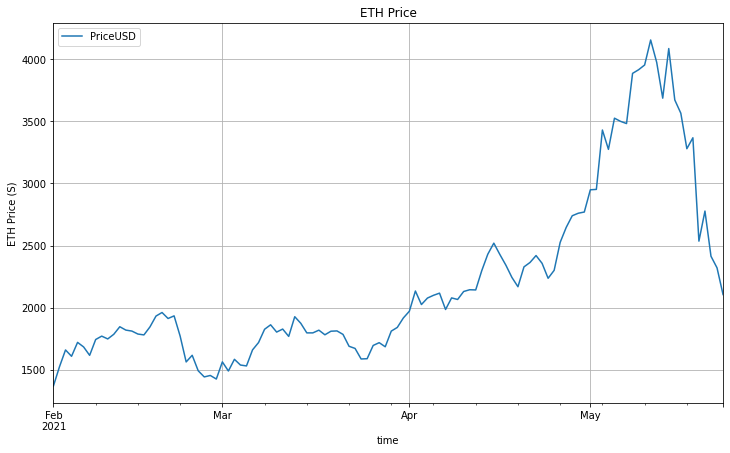

In [31]:
#Plot ETH historical prices in USD
eth_price = eth_metrics[['PriceUSD']]
eth_price.plot(figsize= (12,7), grid=True, title="ETH Price", ylabel='ETH Price (S)')

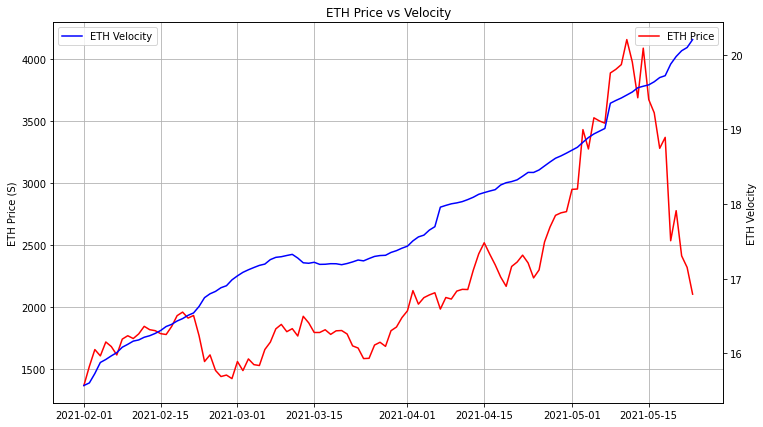

In [32]:
#Plot coin velocity vs coin price (velocity has inverse correlation with coin price)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'], label ='ETH Price', color='r')
ax.set_ylabel('ETH Price (S)')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['VelCur1yr'], label='ETH Velocity', color='b')
ax.set_title('ETH Price vs Velocity')
ax2.set_ylabel('ETH Velocity') 
ax2.legend(loc='upper left')


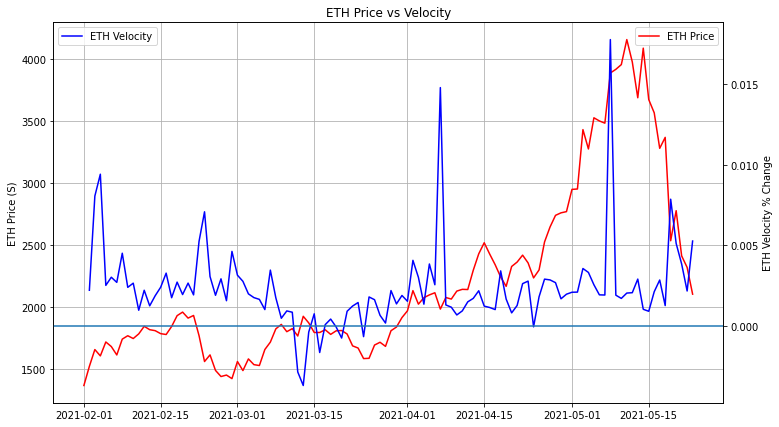

In [33]:
#Plot % Velocity change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'], label ='ETH Price', color='r')
ax.set_ylabel('ETH Price (S)')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['VelCur1yr'].pct_change().dropna(), label='ETH Velocity', color='b')
ax.set_title('ETH Price vs Velocity')
ax2.set_ylabel('ETH Velocity % Change') 
ax2.legend(loc='upper left')
plt.axhline(0)

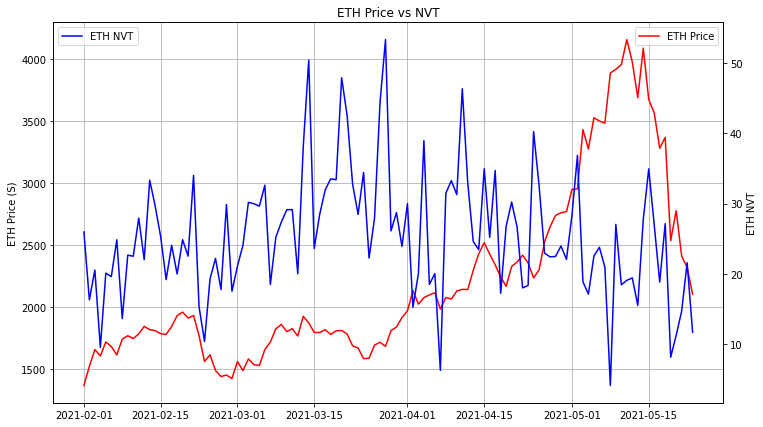

In [34]:
#Plot coin NVT - Network Value to Transaction (NVT) Ratio describes the relationship between market cap and transfer volumes (inverse velocity)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'], label ='ETH Price', color='r')
ax.set_ylabel('ETH Price (S)')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['NVTAdj'], label='ETH NVT', color='b')
ax.set_title('ETH Price vs NVT')
ax2.set_ylabel('ETH NVT') 
ax2.legend(loc='upper left')

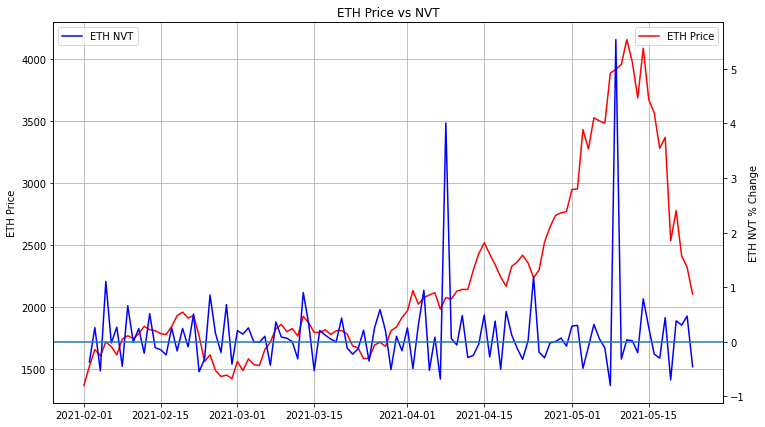

In [35]:
#Plot % NVT Change 
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'],label ='ETH Price', color='r')
ax.set_ylabel('ETH Price')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['NVTAdj'].pct_change().dropna(), label='ETH NVT', color='b')
ax.set_title('ETH Price vs NVT')
ax2.set_ylabel('ETH NVT % Change') 
ax2.legend(loc='upper left')
plt.axhline(0)

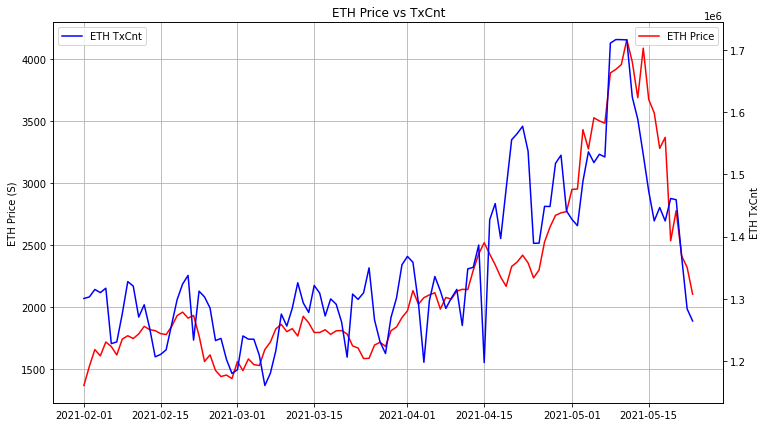

In [36]:
# Plot Tx Count change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'],label ='ETH Price', color='r')
ax.set_ylabel('ETH Price (S)')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['TxCnt'], label='ETH TxCnt', color='b')
ax.set_title('ETH Price vs TxCnt')
ax2.set_ylabel('ETH TxCnt') 
ax2.legend(loc='upper left')

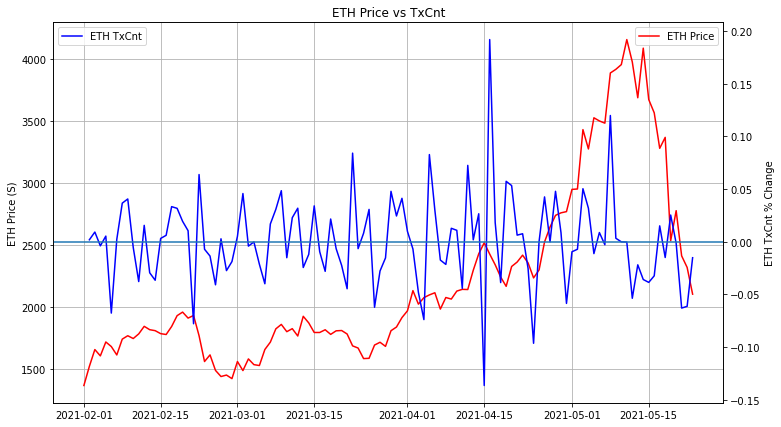

In [37]:
# Plot Tx Count % change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'],label ='ETH Price', color='r')
ax.set_ylabel('ETH Price (S)')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['TxCnt'].pct_change().dropna(), label='ETH TxCnt', color='b')
ax.set_title('ETH Price vs TxCnt')
ax2.set_ylabel('ETH TxCnt % Change') 
ax2.legend(loc='upper left')
plt.axhline(0)

In [38]:
eth_metrics.to_csv('resources/eth_metrics.csv')